In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import seaborn as sns

# visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import re

In [3]:
def trans(x):
    if(bool(re.search(r'\d', x))):
        return int(x.replace(',', ''))
    return 0

In [4]:
data = pd.read_csv('/home/otavio/ml/datasets/startups/investments.csv', encoding = "ISO-8859-1")
data = data[data['founded_year'] >= 2000]
data['founded_year'] = data['founded_year'].apply(lambda x: int(x))
data[' funding_total_usd '] = data[' funding_total_usd '].apply(trans)

In [5]:
data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [6]:
data

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000,acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000,operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000,operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000,operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,7000000,NaN,USA,FL,Ft. Lauderdale,...,0.0,0.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49427,/organization/zyngenia,Zyngenia,http://www.zyngenia.com,|Biotechnology|,Biotechnology,25000000,operating,USA,MD,"Washington, D.C.",...,0.0,0.0,25000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49428,/organization/zynstra,Zynstra,http://www.zynstra.com,|Software|,Software,14750000,operating,GBR,NaN,Bath,...,0.0,0.0,3800000.0,8400000.0,0.0,0.0,0.0,0.0,0.0,0.0
49432,/organization/zytoprotec,Zytoprotec,http://www.zytoprotec.com,|Biotechnology|,Biotechnology,2686600,operating,AUT,NaN,Vienna,...,0.0,0.0,2686600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49433,/organization/zzish,Zzish,http://www.zzish.com,|Analytics|Gamification|Developer APIs|iOS|And...,Education,320000,operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


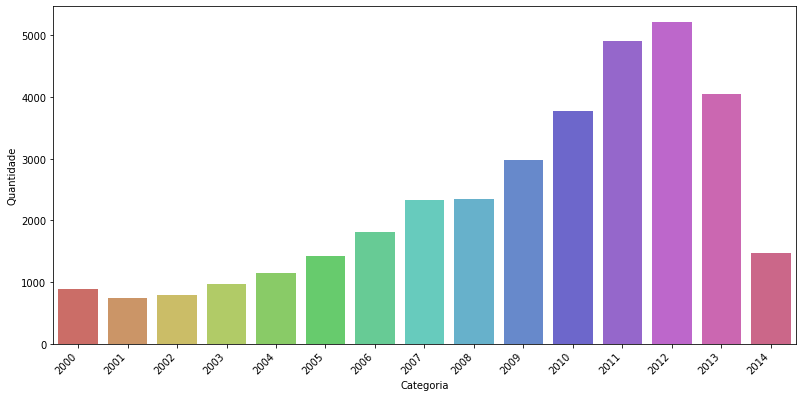

In [7]:
plt.figure(figsize=(11.25,5.625))
fig = sns.countplot(x=data['founded_year'], palette="hls", orient='h')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, horizontalalignment='right')
fig.set(xlabel='Categoria', ylabel='Quantidade')
plt.tight_layout()
fig.get_figure().savefig('out.png')

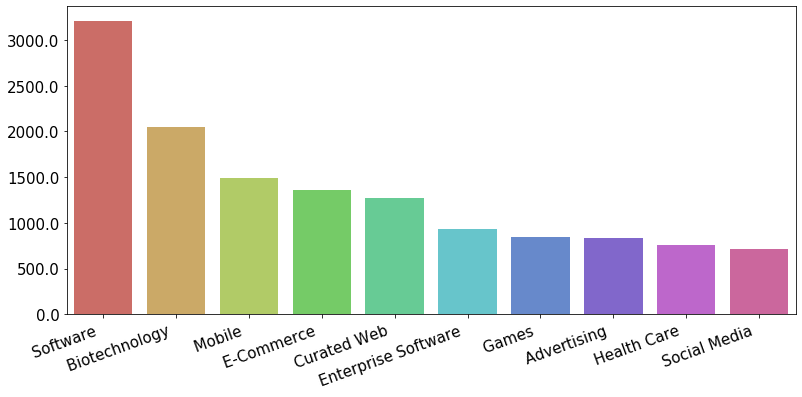

In [8]:
plt.figure(figsize=(11.25,5.625))
fig = sns.countplot(x=data[' market '], palette="hls", orient='h', order=data[' market '].value_counts().iloc[:10].index)
fig.set_xticklabels(fig.get_xticklabels(), rotation=20, horizontalalignment='right', size=15)
fig.set_yticklabels(fig.get_yticks(), size=15)
fig.set(xlabel='', ylabel='')
plt.tight_layout()
fig.get_figure().savefig('out.png')

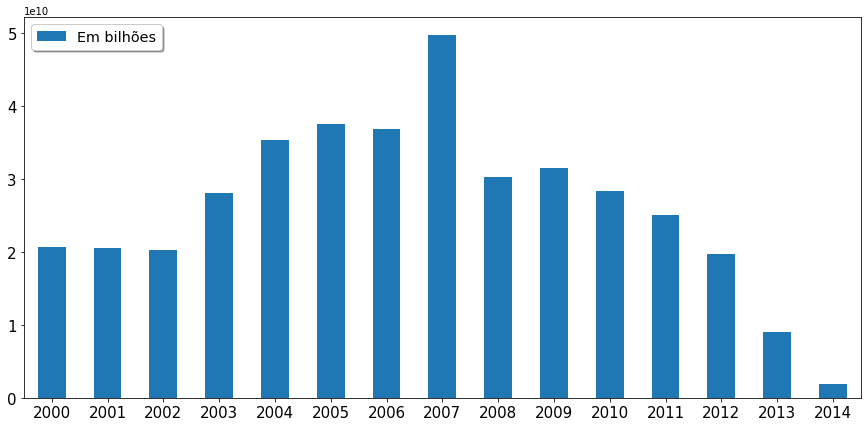

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
sui = data.groupby(['founded_year'])[' funding_total_usd '].sum()
sui.plot(kind='bar')
plt.xticks(rotation=0, size=15)
plt.yticks(size=15)
ax.legend(['Em bilhões'], loc='upper left', shadow=True, fontsize='x-large')
plt.ylabel('')
plt.xlabel('')
fig.savefig('out1.png')

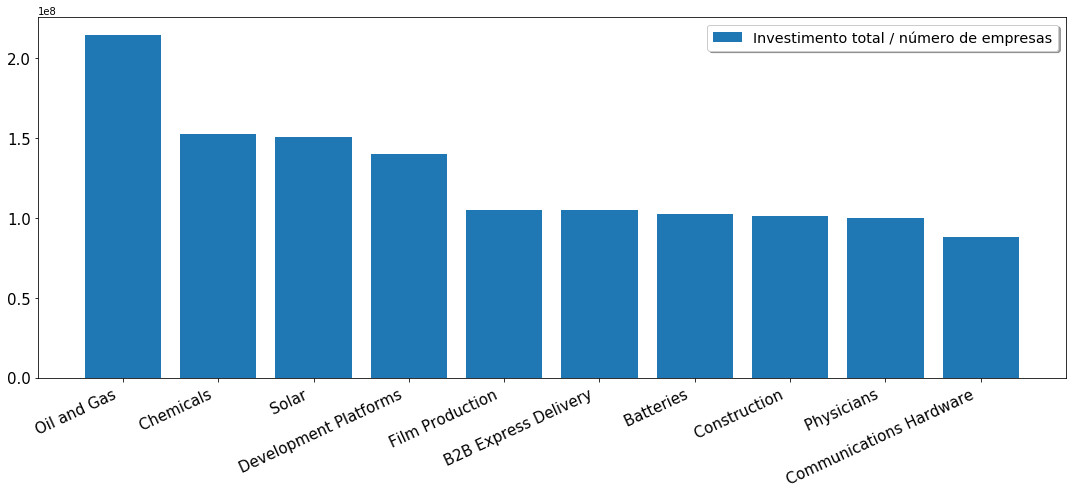

In [14]:
inv = data.groupby([' market '])[' funding_total_usd '].sum()
inv = inv.to_frame().reset_index()
mkt_count = data[' market '].value_counts().to_dict()
inv['relative'] = inv[' funding_total_usd '] / inv[' market '].map(mkt_count)
fig, ax = plt.subplots(figsize=(15,7))
inv = inv.sort_values(ascending=False, by='relative')[:10]
plt.bar(inv[' market '], inv['relative'])
plt.xticks(rotation=25, horizontalalignment='right', size=15)
plt.yticks(size=15)
ax.legend(['Investimento total / número de empresas'], loc='upper right', shadow=True, fontsize='x-large')
plt.tight_layout()
# plt.show()
plt.savefig('out3.png')